# ПРОЕКТ

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import spectral_clustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Исследование и подготовка данных

In [2]:
#Загрузка исходных данных
FILEPATH ='C:/Users/yuliya.tetereva/python'
dfs = pd.read_csv(FILEPATH + '/wine_red.csv', sep=';')
dfs

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
dfs.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


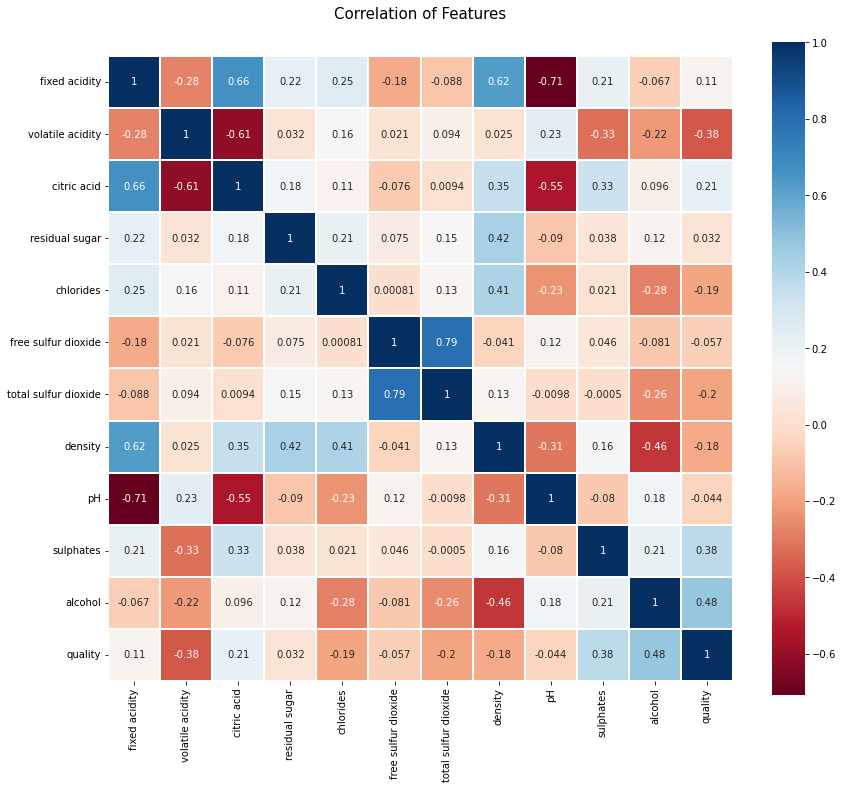

In [5]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(dfs.corr('spearman'),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [6]:
df_second = pd.DataFrame(dfs, columns=['fixed acidity', 'volatile acidity','residual sugar','chlorides','total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'quality'])
df_second

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,1.9,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,2.6,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,2.3,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,1.9,0.075,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,1.9,0.076,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,44.0,0.99490,0.58,10.5,5
1595,5.9,0.550,2.2,0.062,51.0,0.99512,0.76,11.2,6
1596,6.3,0.510,2.3,0.076,40.0,0.99574,0.75,11.0,6
1597,5.9,0.645,2.0,0.075,44.0,0.99547,0.71,10.2,5


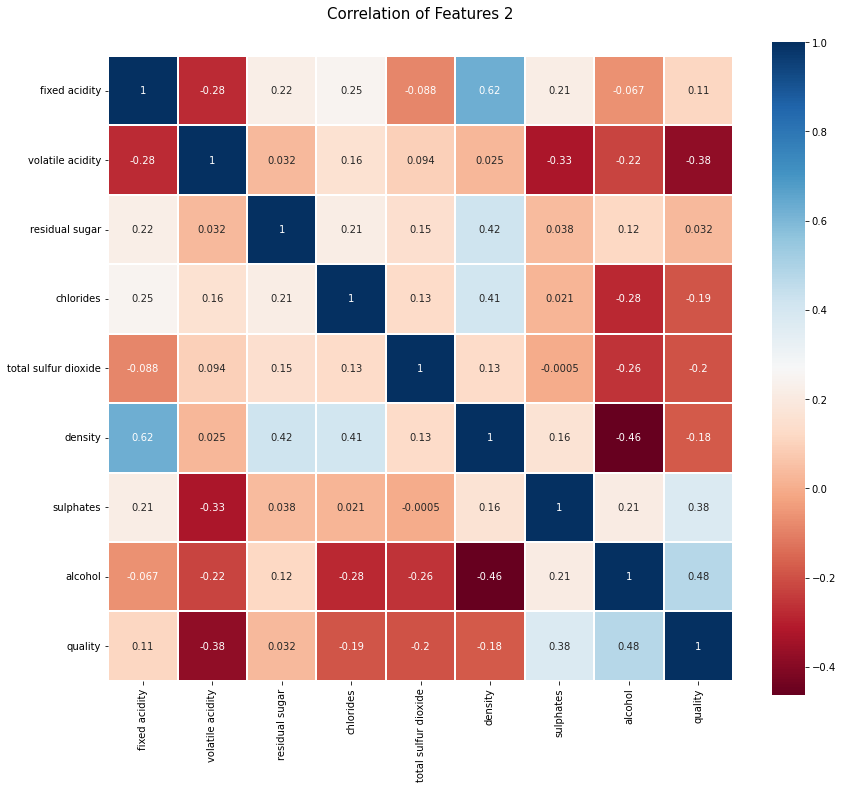

In [7]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features 2', y=1.05, size=15)
sns.heatmap(df_second.corr('spearman'),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [48]:
df_third = pd.DataFrame(dfs, columns=['fixed acidity', 'volatile acidity','residual sugar','chlorides','total sulfur dioxide', 'sulphates', 'alcohol', 'quality'])
df_third

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.700,1.9,0.076,34.0,0.56,9.4,5
1,7.8,0.880,2.6,0.098,67.0,0.68,9.8,5
2,7.8,0.760,2.3,0.092,54.0,0.65,9.8,5
3,11.2,0.280,1.9,0.075,60.0,0.58,9.8,6
4,7.4,0.700,1.9,0.076,34.0,0.56,9.4,5
...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,44.0,0.58,10.5,5
1595,5.9,0.550,2.2,0.062,51.0,0.76,11.2,6
1596,6.3,0.510,2.3,0.076,40.0,0.75,11.0,6
1597,5.9,0.645,2.0,0.075,44.0,0.71,10.2,5


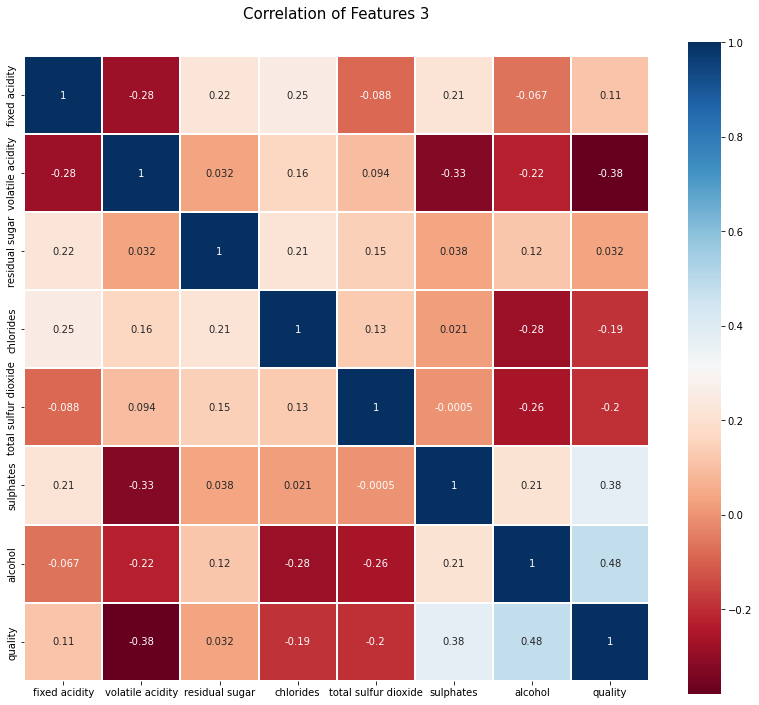

In [9]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features 3', y=1.05, size=15)
sns.heatmap(df_third.corr('spearman'),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

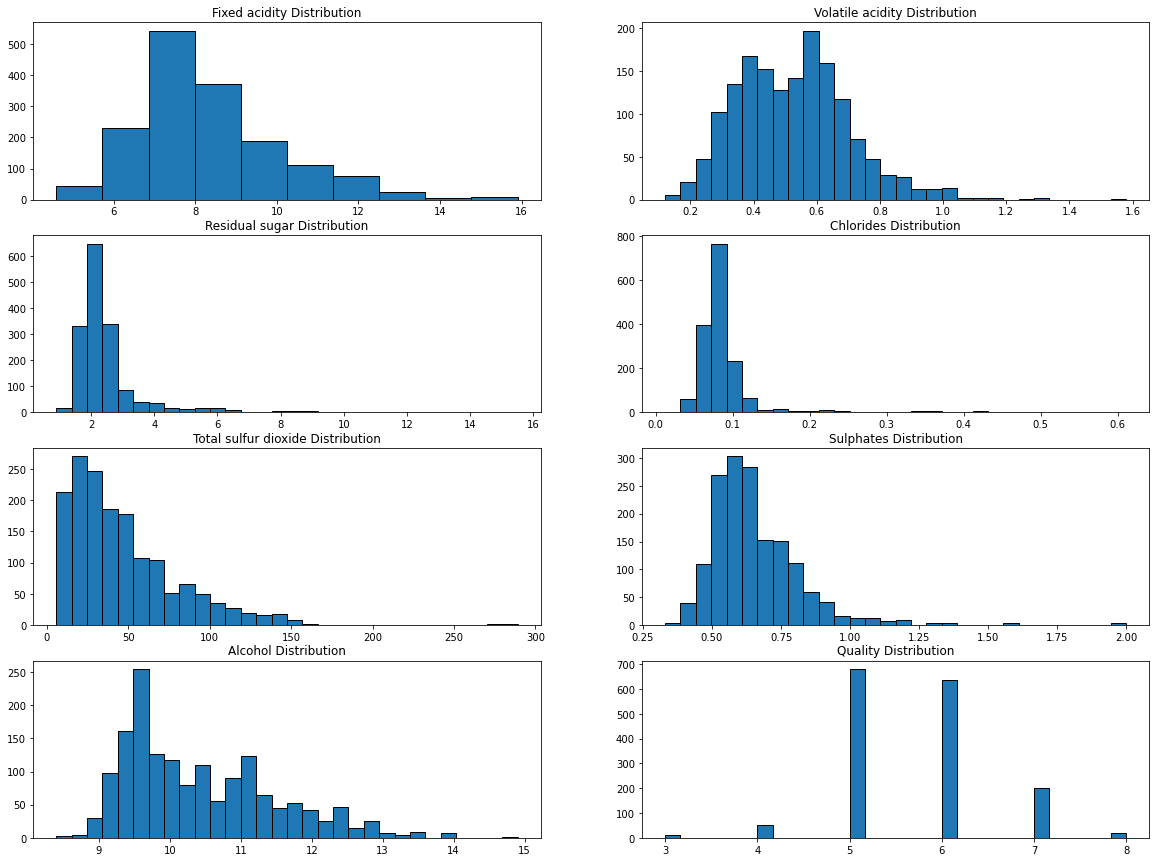

In [10]:
gridsize = (4, 2)
fig = plt.figure(figsize=(20, 15))

ax2 = plt.subplot2grid(gridsize, (0, 0))
ax2.hist(df_third['fixed acidity'].dropna(), bins = 10, edgecolor = 'k');
ax2.set_title("Fixed acidity Distribution");

ax3 = plt.subplot2grid(gridsize, (0, 1))
ax3.hist(df_third['volatile acidity'].dropna(), bins = 30, edgecolor = 'k');
ax3.set_title('Volatile acidity Distribution');
 
ax4 = plt.subplot2grid(gridsize, (1, 0))
ax4.hist(df_third['residual sugar'].dropna(), bins = 30, edgecolor = 'k'); 
ax4.set_title('Residual sugar Distribution');

ax5 = plt.subplot2grid(gridsize, (1, 1))
ax5.hist(df_third['chlorides'].dropna(), bins = 30, edgecolor = 'k');
ax5.set_title('Chlorides Distribution');

ax6 = plt.subplot2grid(gridsize, (2, 0))
ax6.hist(df_third['total sulfur dioxide'].dropna(), bins = 30, edgecolor = 'k');
ax6.set_title('Total sulfur dioxide Distribution');

ax7 = plt.subplot2grid(gridsize, (2, 1))
ax7.hist(df_third['sulphates'].dropna(), bins = 30, edgecolor = 'k');
ax7.set_title('Sulphates Distribution');
 
ax8 = plt.subplot2grid(gridsize, (3, 0))
ax8.hist(df_third['alcohol'].dropna(), bins = 30, edgecolor = 'k');
ax8.set_title('Alcohol Distribution');

ax9 = plt.subplot2grid(gridsize, (3, 1))
ax9.hist(df_third['quality'].dropna(), bins = 30, edgecolor = 'k');
ax9.set_title('Quality Distribution');

plt.show()

In [11]:
correlations_data = df_third.corr()['quality'].sort_values()
print(correlations_data)

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
chlorides              -0.128907
residual sugar          0.013732
fixed acidity           0.124052
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


C:\Users\yuliya.tetereva\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


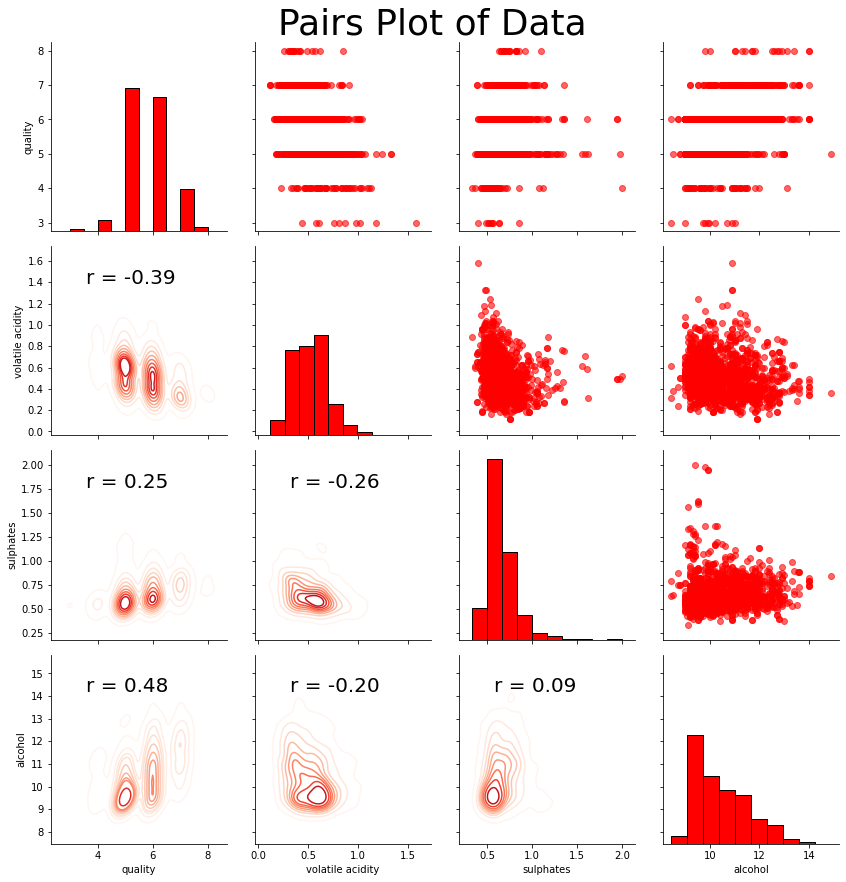

In [12]:
# Extract the columns to plot
plot_data = df_third[['quality','volatile acidity','sulphates','alcohol']]

plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})
                                      
#Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Data', size = 36, y = 1.02);

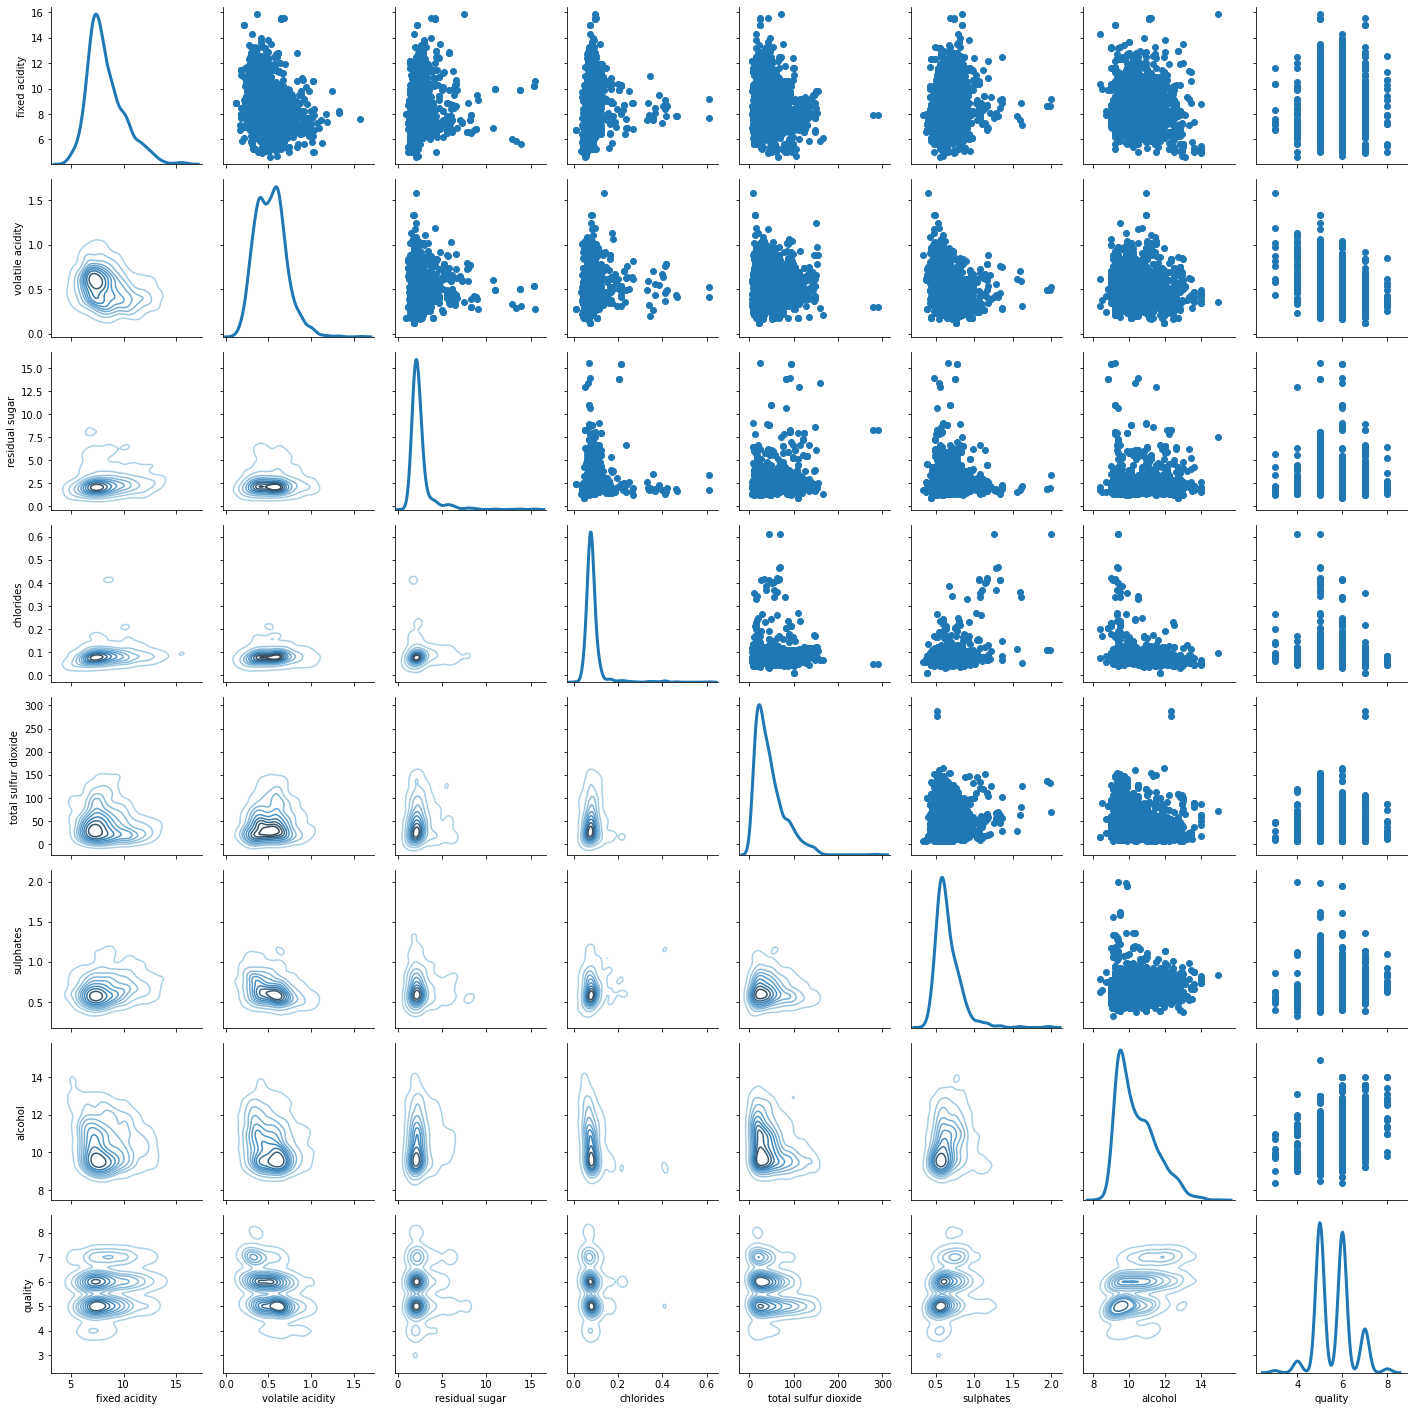

In [13]:
g = sns.PairGrid(df_third, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

# Классификация

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

##  Метод RandomForestClassifier

In [15]:
X = pd.DataFrame(dfs, columns=['fixed acidity', 'volatile acidity','residual sugar','chlorides','total sulfur dioxide', 'sulphates', 'alcohol'])
y = dfs['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state = 2020, stratify=y)
y_train = np.array(y_train)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)
conf_matrix_baseline1 = pd.DataFrame(confusion_matrix(y_test, y_pred_rfc))
conf_matrix_baseline1

,0,1,2,3,4,5
0,0,0,5,2,0,0
1,0,0,19,18,0,0
2,0,0,334,133,10,0
3,0,0,111,297,38,1
4,0,0,6,76,56,1
5,0,0,0,10,3,0


In [16]:
report1 = classification_report(y_test, y_pred_rfc)
print(report1)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        37
           5       0.70      0.70      0.70       477
           6       0.55      0.66      0.60       447
           7       0.52      0.40      0.46       139
           8       0.00      0.00      0.00        13

    accuracy                           0.61      1120
   macro avg       0.30      0.29      0.29      1120
weighted avg       0.59      0.61      0.60      1120



C:\Users\yuliya.tetereva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yuliya.tetereva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yuliya.tetereva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Метод DecisionTreeClassifier

In [17]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred_dtc))
conf_matrix_baseline

,0,1,2,3,4,5
0,1,1,3,1,1,0
1,1,5,17,12,2,0
2,1,28,292,134,22,0
3,0,4,116,258,65,4
4,0,2,17,62,56,2
5,0,0,1,7,3,2


In [18]:
report2 = classification_report(y_test, y_pred_dtc)
print(report2)

              precision    recall  f1-score   support

           3       0.33      0.14      0.20         7
           4       0.12      0.14      0.13        37
           5       0.65      0.61      0.63       477
           6       0.54      0.58      0.56       447
           7       0.38      0.40      0.39       139
           8       0.25      0.15      0.19        13

    accuracy                           0.55      1120
   macro avg       0.38      0.34      0.35      1120
weighted avg       0.55      0.55      0.55      1120



## Метод KNeighborsClassifier

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred_kn = classifier.predict(X_test)
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred_kn))
conf_matrix_baseline

,0,1,2,3,4,5
0,2,0,4,1,0,0
1,1,1,20,15,0,0
2,2,5,312,151,7,0
3,0,1,162,238,46,0
4,0,0,14,71,54,0
5,0,0,0,10,3,0


In [20]:
report3 = classification_report(y_test, y_pred_kn)
print(report3)

              precision    recall  f1-score   support

           3       0.40      0.29      0.33         7
           4       0.14      0.03      0.05        37
           5       0.61      0.65      0.63       477
           6       0.49      0.53      0.51       447
           7       0.49      0.39      0.43       139
           8       0.00      0.00      0.00        13

    accuracy                           0.54      1120
   macro avg       0.36      0.31      0.33      1120
weighted avg       0.52      0.54      0.53      1120



C:\Users\yuliya.tetereva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yuliya.tetereva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yuliya.tetereva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Метод AdaBoostClassifier

In [21]:
model=AdaBoostClassifier(n_estimators=100)
clf=model.fit(df_third,df_third['quality'])
clf.fit(X_train, y_train)
y_pred_ada = classifier.predict(X_test)
conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred_ada))
conf_matrix_baseline

,0,1,2,3,4,5
0,2,0,4,1,0,0
1,1,1,20,15,0,0
2,2,5,312,151,7,0
3,0,1,162,238,46,0
4,0,0,14,71,54,0
5,0,0,0,10,3,0


In [22]:
report4 = classification_report(y_test, y_pred_ada)
print(report4)

              precision    recall  f1-score   support

           3       0.40      0.29      0.33         7
           4       0.14      0.03      0.05        37
           5       0.61      0.65      0.63       477
           6       0.49      0.53      0.51       447
           7       0.49      0.39      0.43       139
           8       0.00      0.00      0.00        13

    accuracy                           0.54      1120
   macro avg       0.36      0.31      0.33      1120
weighted avg       0.52      0.54      0.53      1120



C:\Users\yuliya.tetereva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yuliya.tetereva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yuliya.tetereva\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

knn_rad = fit_and_evaluate(rfc)
knn_desc = fit_and_evaluate(dtc)
knn_mae = fit_and_evaluate(classifier)
knn_ada = fit_and_evaluate(clf)

<Figure size 576x432 with 0 Axes>

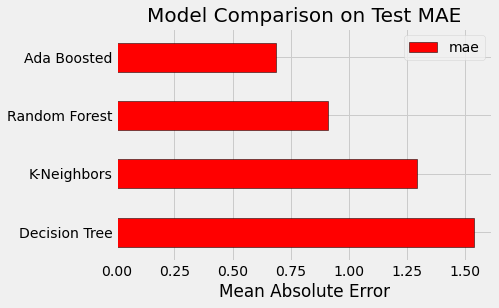

In [24]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 6))

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Random Forest', 'Decision Tree' , 'K-Neighbors', 'Ada Boosted'],
                                 'mae': [knn_rad, knn_mae, knn_desc, knn_ada ]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

## Проверка результатов

In [25]:
test_df = pd.DataFrame(y_test)
test_df['quality_new'] = y_pred_rfc
test_df

,quality,quality_new
54,6,6
794,6,6
921,6,6
275,6,6
477,6,7
...,...,...
566,6,5
1197,6,5
1486,5,6
1050,5,6


In [26]:
test_df.loc[(test_df['quality'] != test_df['quality_new']), 'Изменение качества'] = 1
test_df.loc[(test_df['quality'] == test_df['quality_new']), 'Изменение качества'] = 0
c = test_df['Изменение качества'].sum()
c

433.0

In [27]:
print('Качество определилось неверно для, % записей: ')
print(c*100/y_test.size)

Качество определилось неверно для, % записей: 
38.660714285714285


### Индекс Rand 

In [37]:
from sklearn import metrics
labels_true = test_df['quality']
labels_pred = test_df['quality_new']
metrics.adjusted_rand_score(labels_true, labels_pred)

0.178530727977608

Также представим визуально, насколько точно методы предсказали качество вина.

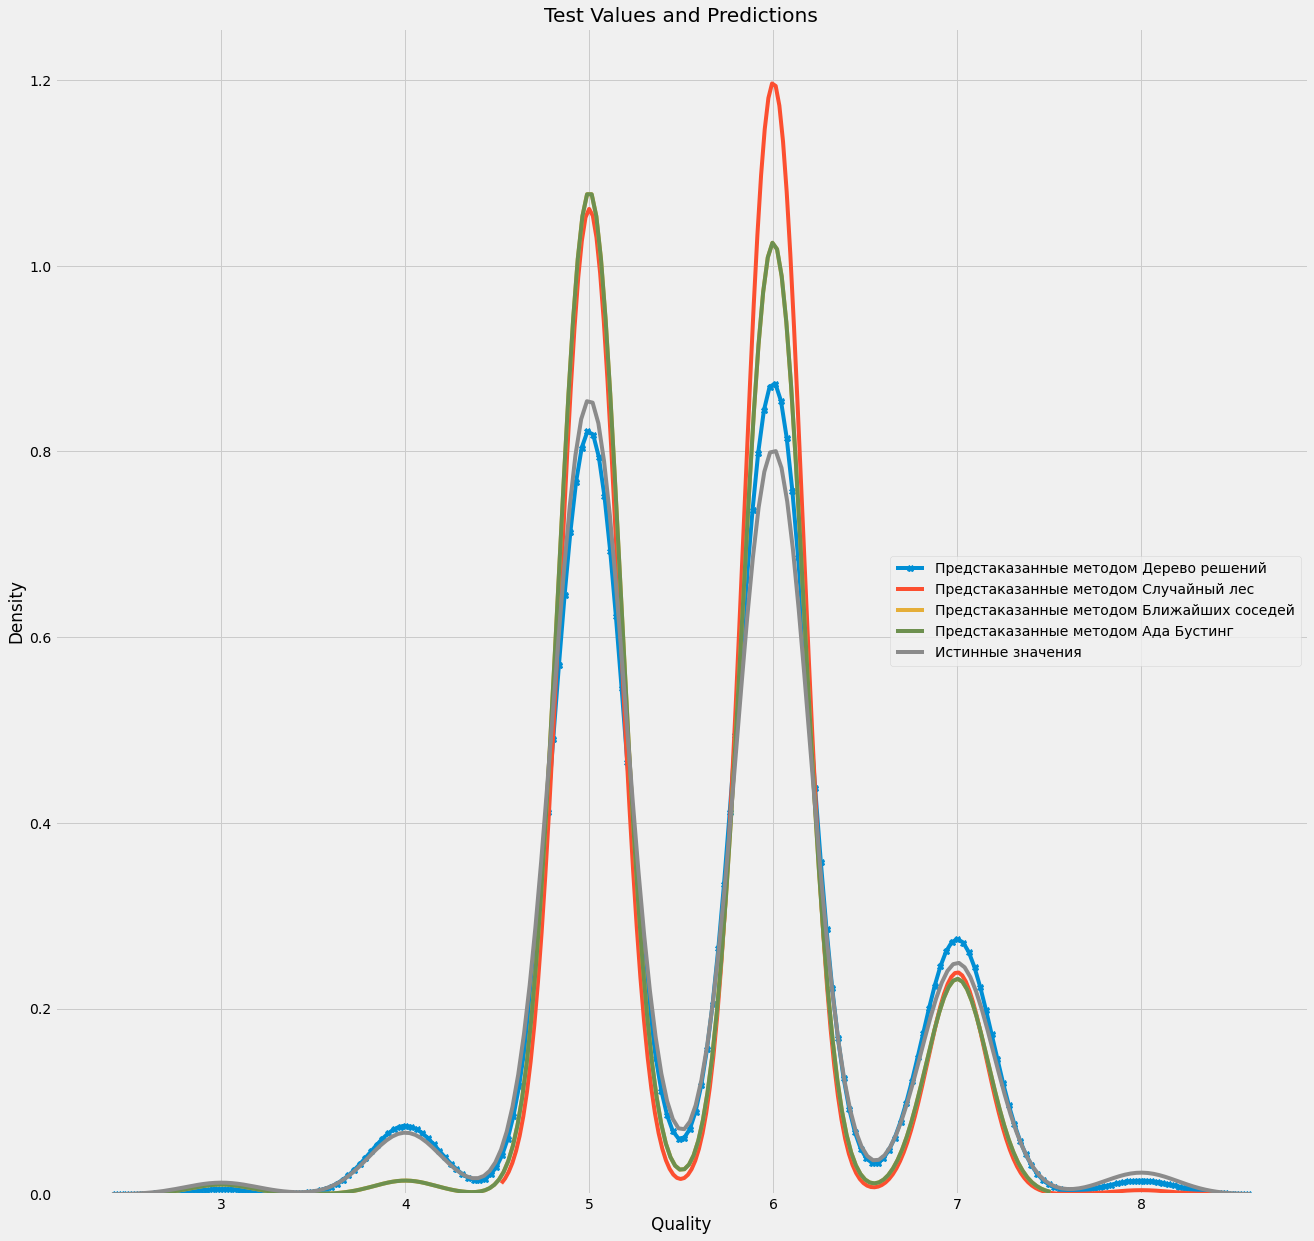

In [29]:
plt.figure(figsize=(20, 20))

sns.kdeplot(y_pred_dtc, label = 'Предстаказанные методом Дерево решений',marker='X')
sns.kdeplot(y_pred_rfc, label = 'Предстаказанные методом Случайный лес')
sns.kdeplot(y_pred_kn, label = 'Предстаказанные методом Ближайших соседей')
sns.kdeplot(y_pred_ada, label = 'Предстаказанные методом Ада Бустинг')
sns.kdeplot(y_test, label = 'Истинные значения')

# Label the plot
plt.xlabel('Quality'); plt.ylabel('Density'); 
plt.title('Test Values and Predictions');plt.legend(loc=5);

In [30]:
# model is the trained model
importances = dtc.feature_importances_

# train_features is the dataframe of training features
df_third2 = pd.DataFrame(dfs, columns=['fixed acidity', 'volatile acidity','residual sugar','chlorides','total sulfur dioxide', 'sulphates', 'alcohol'])

feature_list = list(df_third2.columns)

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,alcohol,0.209768
1,sulphates,0.165480
2,total sulfur dioxide,0.147745
3,fixed acidity,0.121994
4,residual sugar,0.120950
5,chlorides,0.117212
6,volatile acidity,0.116852


## Выводы

# Кластеризация

C:\Users\yuliya.tetereva\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
No handles with labels found to put in legend.


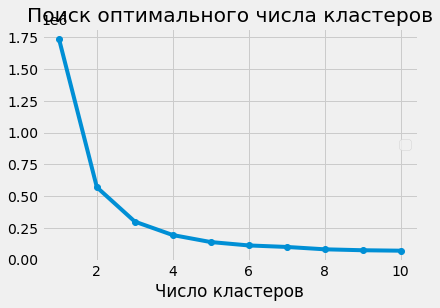

In [31]:
from sklearn.cluster import KMeans

sse = []
for i in range(1,11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=500,
        random_state=0)
    km.fit(df_third)
    sse.append(km.inertia_)
    
plt.xlabel('Число кластеров'); 
plt.title('Поиск оптимального числа кластеров');plt.legend(loc=5);
    
plt.plot(range(1,11), sse, marker='o')
plt.show()

In [49]:
## Преобразовать в матрицу, вход должен быть симметричной матрицей
metrics_metrix = (-1 * metrics.pairwise.pairwise_distances(df_third,metric='euclidean')).astype(np.int32)
metrics_metrix += -1 * metrics_metrix.min()

 ## Установите функцию спектральной кластеризации
n_clusters_= 3
lables = spectral_clustering(metrics_metrix, n_clusters=n_clusters_)
lables

array([2, 2, 2, ..., 2, 2, 2])

In [43]:
df_third['cluster']= lables
df_third

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,sulphates,alcohol,quality,cluster
0,7.4,0.700,1.9,0.076,34.0,0.56,9.4,5,0
1,7.8,0.880,2.6,0.098,67.0,0.68,9.8,5,0
2,7.8,0.760,2.3,0.092,54.0,0.65,9.8,5,0
3,11.2,0.280,1.9,0.075,60.0,0.58,9.8,6,0
4,7.4,0.700,1.9,0.076,34.0,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,2.0,0.090,44.0,0.58,10.5,5,0
1595,5.9,0.550,2.2,0.062,51.0,0.76,11.2,6,0
1596,6.3,0.510,2.3,0.076,40.0,0.75,11.0,6,0
1597,5.9,0.645,2.0,0.075,44.0,0.71,10.2,5,0


In [34]:
cl_table = pd.pivot_table(df_third, index=['cluster'])
cl_table

,alcohol,chlorides,fixed acidity,quality,residual sugar,sulphates,total sulfur dioxide,volatile acidity
cluster,,,,,,,,
0,10.337314,0.090637,8.244460,5.618705,2.490863,0.666230,52.906475,0.524820
1,10.044787,0.088194,7.878199,5.322275,3.208057,0.657299,111.900474,0.569431
2,10.624050,0.084065,8.529437,5.748918,2.383117,0.650303,20.088023,0.518160


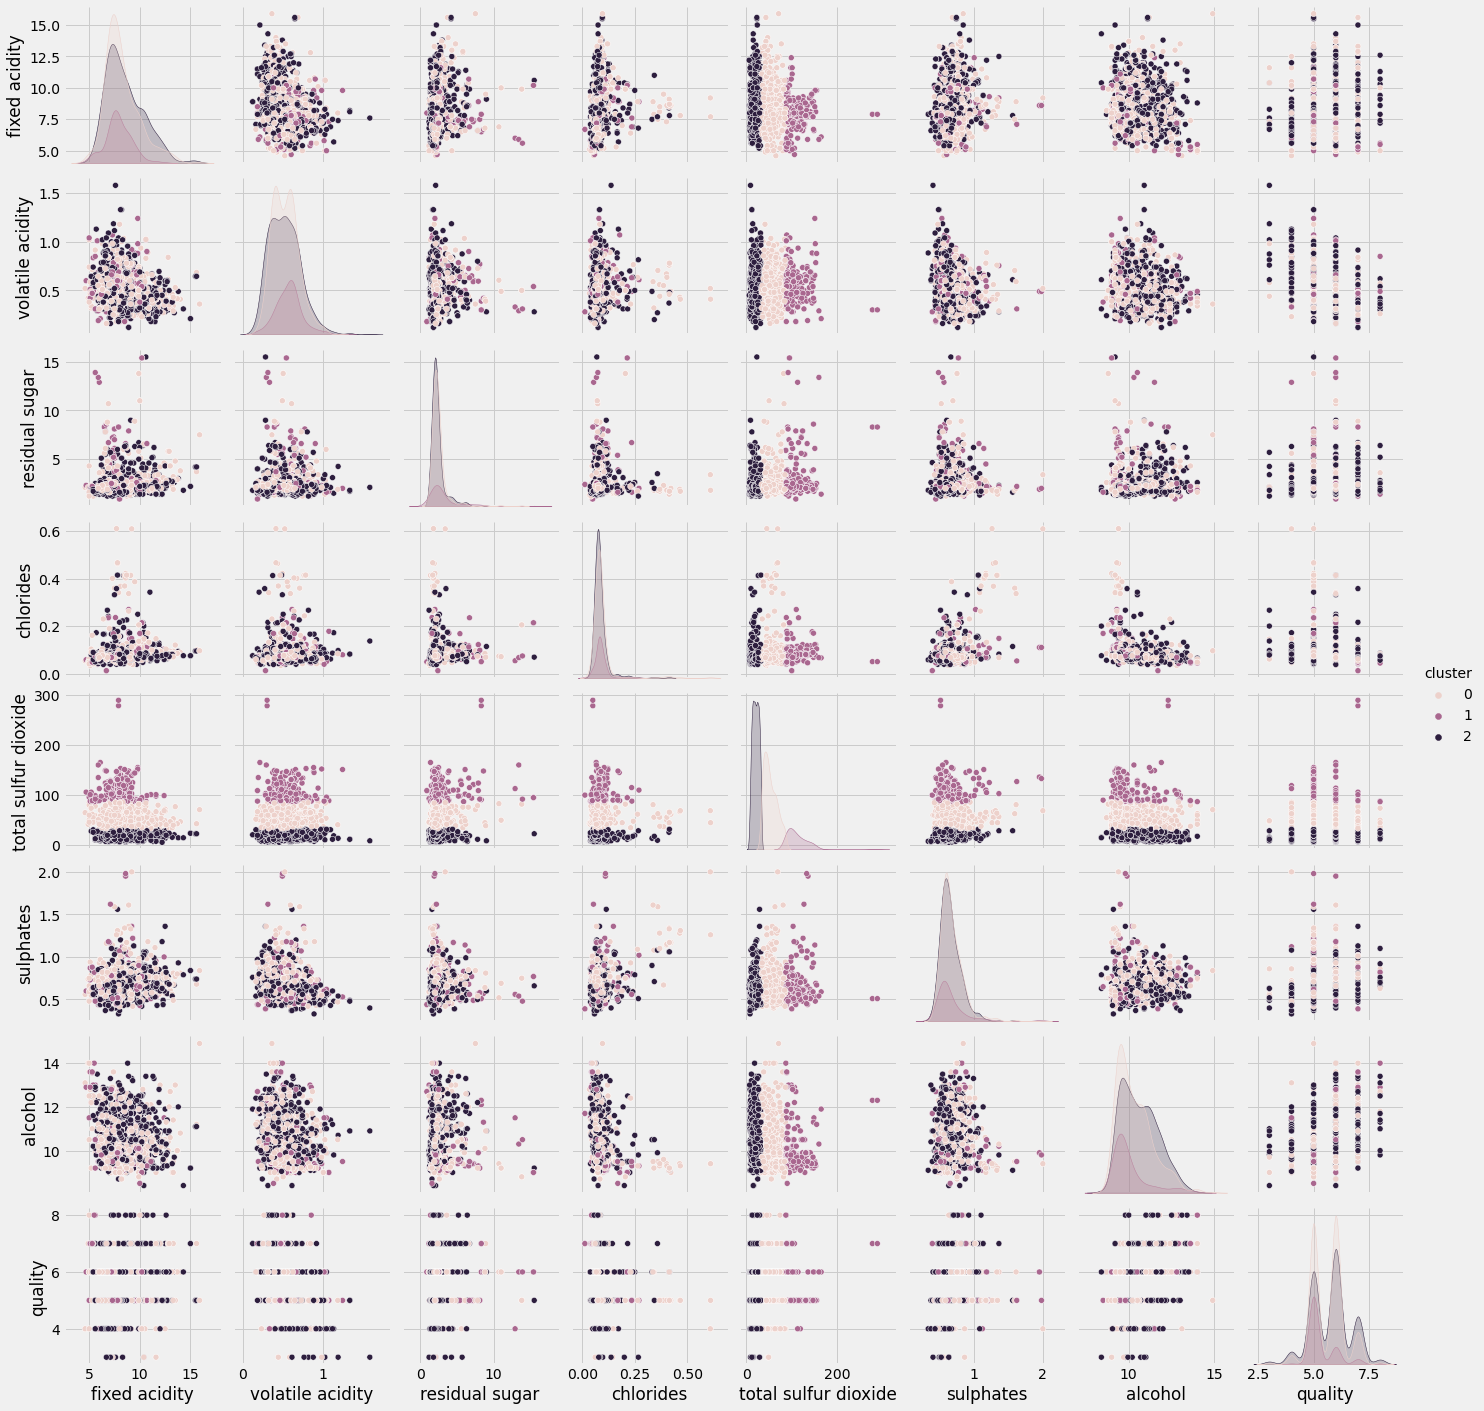

In [35]:
graf = sns.pairplot(df_third, hue="cluster");

In [36]:
test_df2 = df_third
test_df2.loc[(test_df2['cluster'] == 0), 'c1'] = 1
test_df2.loc[(test_df2['cluster'] == 1), 'c2'] = 1
test_df2.loc[(test_df2['cluster'] == 2), 'c3'] = 1

test_df2.loc[(test_df2['cluster'] != 0), 'c1'] = 0
test_df2.loc[(test_df2['cluster'] != 1), 'c2'] = 0
test_df2.loc[(test_df2['cluster'] != 2), 'c3'] = 0

count1 = test_df2['c1'].sum()
count2 = test_df2['c2'].sum()
count3 = test_df2['c3'].sum()

print('Количество данных, попавших в первый кластер ', count1)
print('Количество данных, попавших в второй кластер ', count2)
print('Количество данных, попавших в третий кластер ', count3)

Количество данных, попавших в первый кластер  695.0
Количество данных, попавших в второй кластер  211.0
Количество данных, попавших в третий кластер  693.0


## Проверка
Коэффициент силуета

In [46]:
metrics.silhouette_score(X, lables)

0.5388786121167867

In [51]:
metrics.calinski_harabasz_score(X, lables)

3479.684236004917

# Предложения по развитию работы